## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#datawrangling)
- [Analysis and Visualization](#analysis)
- [Reporting](#reporting)

<a id='intro'></a>
# Introduction

This project was focused primarily on data wrangling. I have gathered, assessed and cleaned data from the WeRateDogs twitter account, @dog_rates. Starting with basic data provided by Twitter directly, I have also wrangled additional data from Twitter’s API to perform an interesting and entertaining analysis on dog ratings.

<a id='datawrangling'></a>
# I. Data Wrangling

## i. Gathering

In [187]:
#read in data
import pandas as pd
import numpy as np
twitter_1 = pd.read_csv('twitter-archive-enhanced.csv')
twitter_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [188]:
#read in image predictions
import pandas as pd
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
predict = pd.read_csv(url,'\t')
predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [189]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [190]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_1.tweet_id.values
len(tweet_ids)

2356

In [33]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json1.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [191]:
#convert api json data into dataframe
import json
tweets = []
for line in open('tweet_json1.txt', 'r'):
    tweets.append(json.loads(line))
twitter_2 = pd.DataFrame.from_dict(tweets)
twitter_2.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38177,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8353,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32738,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6171,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24648,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4084,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41507,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8499,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39682,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9190,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## ii. Assessing

**Assessing tables for missing values and datatypes**

In [235]:
twitter_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [165]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [166]:
twitter_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

**Assessing the tables descriptive stats**

In [50]:
twitter_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [48]:
predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
twitter_2.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2342.000000,2.342000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2342.000000
mean,7990.619556,7.422212e+17,7.440692e+17,2.040329e+16,8.113972e+17,2945.979078
std,12368.122440,6.832408e+16,7.524295e+16,1.260797e+17,6.295843e+16,4954.221196
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1379.000000,6.783509e+17,6.757073e+17,3.589728e+08,7.761338e+17,591.500000
50%,3475.000000,7.186224e+17,7.032559e+17,4.196984e+09,8.281173e+17,1375.000000
75%,9789.250000,7.986971e+17,8.233264e+17,4.196984e+09,8.637581e+17,3437.250000
max,164769.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,83953.000000


**Assessing tables for duplicates**

In [56]:
twitter_1.duplicated().sum()

0

In [57]:
predict.duplicated().sum()

0

In [69]:
twitter_2.duplicated().sum()
#method does not work because some items contain lists (i.e the entities column. I will get rid of 
#these columns later and assess for duplicates)

TypeError: unhashable type: 'list'

### Issues
*Tidiness Issues:*
    1. both twitter tables should be combined; they will have duplicated columns 
    2. in twitter table, dog stage (i.e. dogger, floofer, pupper, puppo) should not be columns, they are values

*Quality Issues:*
    1. the "id" columns in twitter tables and predict table have different names (tweet_id vs id)
    2. "None" should be null in dog stage columns
    3. only interested in original tweets, not retweets 
    4. incorrect data types: tweet_id in twitter and predict tables, should be an object
    5. twitter tables have columns with null data
    6. there are dog names that were extracted incorrectly from text column
    7. The max rating_numerator is 1776, which seems large; the min rating_numerator is 0, which seems incorrect
    8. The max rating_denominator is 170, which seems large; the min rating_denominator is 0, which seems incorrect


## iii. Cleaning

In [192]:
#creating new copies to work off of
twitter_1_clean = twitter_1.copy()
predict_clean = predict.copy()
twitter_2_clean = twitter_2.copy()

**Tidiness Issue #1: merge `twitter_2` with `twitter_1`; remove unnecessary and duplicate columns among `twitter_1` and `twitter_2`**

In [193]:
#removing unnecessary columns from twitter_2_clean
twitter_2_clean = twitter_2_clean[['id','retweeted_status','retweet_count','favorite_count']]
twitter_2_clean.head()

,id,retweeted_status,retweet_count,favorite_count
0,892420643555336193,NaN,8353,38177
1,892177421306343426,NaN,6171,32738
2,891815181378084864,NaN,4084,24648
3,891689557279858688,NaN,8499,41507
4,891327558926688256,NaN,9190,39682


In [194]:
#relating to Quality Issue #1: change "id" column in twitter_2_clean to make consistent with twitter_1_clean and 
#predict_clean so it can be merged
twitter_2_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
twitter_2_clean.head()

,tweet_id,retweeted_status,retweet_count,favorite_count
0,892420643555336193,NaN,8353,38177
1,892177421306343426,NaN,6171,32738
2,891815181378084864,NaN,4084,24648
3,891689557279858688,NaN,8499,41507
4,891327558926688256,NaN,9190,39682


In [195]:
#join twitter_1_clean and twitter_2_clean on 'twitter_id'
twitter_clean = pd.merge(twitter_1_clean, twitter_2_clean,how = 'left', on='tweet_id')
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweeted_status,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,8353.0,38177.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,6171.0,32738.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN,4084.0,24648.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN,8499.0,41507.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN,9190.0,39682.0


In [196]:
#get rid of unneccesary columns in new table
twitter_clean = twitter_clean[['tweet_id','retweeted_status_id','timestamp','text','retweeted_status','expanded_urls','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo','retweet_count','favorite_count']]
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id               2356 non-null int64
retweeted_status_id    181 non-null float64
timestamp              2356 non-null object
text                   2356 non-null object
retweeted_status       168 non-null object
expanded_urls          2297 non-null object
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
retweet_count          2342 non-null float64
favorite_count         2342 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 294.5+ KB


In [197]:
#query retweets, related to Quality Issue #3
retweets = twitter_clean[twitter_clean['retweeted_status_id'].notnull()]
retweets

,tweet_id,retweeted_status_id,timestamp,text,retweeted_status,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
19,888202515573088257,8.874740e+17,2017-07-21 01:02:36 +0000,RT @dog_rates: This is Canela. She attempted s...,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,NaN,NaN
32,886054160059072513,8.860537e+17,2017-07-15 02:45:48 +0000,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None,105.0,0.0
36,885311592912609280,8.305833e+17,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. She just paralle...,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None,18253.0,0.0
68,879130579576475649,8.780576e+17,2017-06-26 00:13:58 +0000,RT @dog_rates: This is Emmy. She was adopted t...,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None,6726.0,0.0
73,878404777348136964,8.782815e+17,2017-06-24 00:09:53 +0000,RT @dog_rates: Meet Shadow. In an attempt to r...,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None,1270.0,0.0
74,878316110768087041,6.690004e+17,2017-06-23 18:17:33 +0000,RT @dog_rates: Meet Terrance. He's being yelle...,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None,6563.0,0.0
78,877611172832227328,8.768508e+17,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and h...,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None,80.0,0.0
91,874434818259525634,8.663350e+17,2017-06-13 01:14:41 +0000,RT @dog_rates: This is Coco. At first I though...,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None,14589.0,0.0
95,873697596434513921,8.688804e+17,2017-06-11 00:25:14 +0000,RT @dog_rates: This is Walter. He won't start ...,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None,NaN,NaN
97,873337748698140672,8.732138e+17,2017-06-10 00:35:19 +0000,RT @dog_rates: This is Sierra. She's one preci...,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None,1576.0,0.0


In [198]:
#drop retweet rows
twitter_clean = twitter_clean.drop(retweets.index,axis=0)
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id               2175 non-null int64
retweeted_status_id    0 non-null float64
timestamp              2175 non-null object
text                   2175 non-null object
retweeted_status       0 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
retweet_count          2174 non-null float64
favorite_count         2174 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 271.9+ KB


In [199]:
#drop retweet columns
twitter_clean = twitter_clean.drop(['retweeted_status_id','retweeted_status'],axis=1)
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
retweet_count         2174 non-null float64
favorite_count        2174 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 237.9+ KB


**Tidiness Issue #2: create one 'dog_stage' column with dogger, floofer, pupper, puppo as values**

In [200]:
#replacing the "None" values with null values, relating to Quality Issue #2
twitter_clean = twitter_clean.replace('None', np.nan)
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8353.0,38177.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6171.0,32738.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4084.0,24648.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,8499.0,41507.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,9190.0,39682.0


In [201]:
#melt the four columns relating to dog_stage into one column with stage names as values
twitter_clean = pd.melt(twitter_clean, id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count'],value_name='dog_stage')
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,variable,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8353.0,38177.0,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6171.0,32738.0,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4084.0,24648.0,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8499.0,41507.0,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9190.0,39682.0,doggo,NaN


In [202]:
#4 rows per id were added for each dog stage. We only want the original data plus where any values are non-null
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id              8700 non-null int64
timestamp             8700 non-null object
text                  8700 non-null object
expanded_urls         8468 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  5980 non-null object
retweet_count         8696 non-null float64
favorite_count        8696 non-null float64
variable              8700 non-null object
dog_stage             356 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 747.7+ KB


In [203]:
#gathering dog_stages so we can drop and then concatenate it back to the end of the dataframe
twitter_other = twitter_clean[twitter_clean['dog_stage'].notnull()]
twitter_other['dog_stage'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [204]:
#removing dog_stages
twitter_clean = twitter_clean.drop(twitter_other.index,axis=0)
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id              8344 non-null int64
timestamp             8344 non-null object
text                  8344 non-null object
expanded_urls         8118 non-null object
rating_numerator      8344 non-null int64
rating_denominator    8344 non-null int64
name                  5777 non-null object
retweet_count         8340 non-null float64
favorite_count        8340 non-null float64
variable              8344 non-null object
dog_stage             0 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 782.2+ KB


In [205]:
#adding values with dog_stages back to end
twitter_clean = twitter_clean.append(twitter_other,ignore_index=True)
twitter_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,variable,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8353.0,38177.0,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6171.0,32738.0,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4084.0,24648.0,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8499.0,41507.0,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9190.0,39682.0,doggo,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3059.0,19925.0,doggo,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2028.0,11644.0,doggo,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,18537.0,64399.0,doggo,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4198.0,27373.0,doggo,NaN
9,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,7207.0,30207.0,doggo,NaN


In [206]:
#now dropping duplicates, keeping the last value
twitter_clean = twitter_clean.drop_duplicates(subset=['tweet_id'],keep='last')
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 6194 to 8699
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
retweet_count         2174 non-null float64
favorite_count        2174 non-null float64
variable              2175 non-null object
dog_stage             344 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [207]:
#checking the spread of dog_stages
twitter_clean['dog_stage'].value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [208]:
#removing unneccesary 'variable' column
twitter_clean = twitter_clean.drop(['variable'],axis=1)
twitter_clean

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6194,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8353.0,38177.0,NaN
6195,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6171.0,32738.0,NaN
6196,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4084.0,24648.0,NaN
6197,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8499.0,41507.0,NaN
6198,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9190.0,39682.0,NaN
6199,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3059.0,19925.0,NaN
6200,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2028.0,11644.0,NaN
6201,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,18537.0,64399.0,NaN
6202,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4198.0,27373.0,NaN
6204,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,7207.0,30207.0,NaN


**Quality Issue #1 resolved with Tidiness Issue #1**

**Quality Issue #2 resolved with Tidiness Issue #2**

**Quality Issue #3 resolved with Tidiness Issue #1**

**Quality Issue #4:  Correct tweet_id data types in `twitter_clean` and `predict_clean` to object, not integer**

In [209]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(object)
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 6194 to 8699
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
retweet_count         2174 non-null float64
favorite_count        2174 non-null float64
dog_stage             344 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 186.9+ KB


In [210]:
predict_clean['tweet_id'] = predict_clean['tweet_id'].astype(object)
predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Quality Issue #5:  `name` and `dog_stage` do not have data for all rows. `dog_stage` had limited data, but I will keep this column to analyze those that do. There are 677 names that are not filled in.**

In [211]:
twitter_clean['name'] = twitter_clean['name'].astype(object)
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 6194 to 8699
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
retweet_count         2174 non-null float64
favorite_count        2174 non-null float64
dog_stage             344 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 186.9+ KB


In [212]:
#See where names are null but shouldn't be
twitter_clean[twitter_clean['name'].isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6199,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3059.0,19925.0,NaN
6201,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,18537.0,64399.0,NaN
6215,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,10230.0,33174.0,NaN
6216,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,5865.0,30107.0,NaN
6221,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,NaN,4.0,115.0,NaN
6225,885518971528720385,2017-07-13 15:19:09 +0000,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,3699.0,20120.0,NaN
6226,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,NaN,4306.0,21591.0,NaN
6230,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,NaN,5561.0,26582.0,NaN
6231,884247878851493888,2017-07-10 03:08:17 +0000,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,10,NaN,20133.0,71927.0,NaN
6236,883117836046086144,2017-07-07 00:17:54 +0000,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,NaN,6566.0,36630.0,NaN


**Quality Issue #6: identify names that are not actual names**

In [213]:
#creating a list where names show up as lower case names, i.e. likely not a name
lower_case = []
upper_case = []
NaN = []
for name in twitter_clean['name']:
    try:
        if name[0].isupper():
            upper_case.append(name)
        else:
            lower_case.append(name)
    except:
        NaN.append(name)

In [214]:
len(lower_case), len(NaN)

(104, 680)

In [215]:
#creating a dataframe with the lower_case words as names
non_names = twitter_clean[twitter_clean['name'].isin(lower_case)]
non_names

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6213,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,11470.0,45580.0,NaN
6335,859196978902773760,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,30929.0,90991.0,NaN
6354,855459453768019968,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,8507.0,30528.0,NaN
6469,832645525019123713,2017-02-17 17:38:57 +0000,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,563.0,3084.0,NaN
6497,828650029636317184,2017-02-06 17:02:17 +0000,"Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,1463.0,10061.0,NaN
6633,806219024703037440,2016-12-06 19:29:28 +0000,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,1317.0,6893.0,NaN
6704,792913359805018113,2016-10-31 02:17:31 +0000,Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,4433.0,15417.0,NaN
6822,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,1844.0,6900.0,NaN
6837,770655142660169732,2016-08-30 16:11:18 +0000,We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,1895.0,7808.0,NaN
6864,765395769549590528,2016-08-16 03:52:26 +0000,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,3690.0,28091.0,NaN


In [216]:
non_names['name']

6213            such
6335           quite
6354           quite
6469             not
6497             one
6633      incredibly
6704               a
6822               a
6837            very
6864              my
6985             not
6990             one
6999               a
7001               a
7013               a
7020              an
7026            very
7063         getting
7088            very
7111            this
7112    unacceptable
7184               a
7197             old
7198               a
7249     infuriating
7341               a
7351               a
7352              an
7358               a
7375            very
            ...     
8299               a
8302               a
8314           quite
8315               a
8321              an
8322               a
8323              an
8333             the
8334             the
8335               a
8336               a
8337              an
8338               a
8340               a
8341               a
8342               a
8408         

***While there are 104 names in the list above that are clearly not names, I am not going to be assessing names in my analysis so I will not focus on correcting this issue at this time.***

**Quality Issue #7:  fix rating_numerator where maximum and minimum do not appear accurate.**

In [217]:
#checking where rating_numerator appear off.
#min rating_numerator is 0
#max rating_numerator is 1776
twitter_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2175.000000,2175.000000,2174.000000,2174.000000
mean,13.215172,10.492874,2655.237810,8608.109936
std,47.725696,7.019084,4703.446939,12628.503681
min,0.000000,0.000000,0.000000,51.000000
25%,10.000000,10.000000,575.000000,1830.250000
50%,11.000000,10.000000,1270.500000,3882.000000
75%,12.000000,10.000000,3041.500000,10700.500000
max,1776.000000,170.000000,83953.000000,164769.000000


In [218]:
#starting with min_rating_numerator of 0
twitter_clean.query('rating_numerator == 0')
#after following the 2 links in "text" below to furthur investigate, the first one shows a 0/10 rating for 
#being a plagiarized post. I will remove it.
#the second one does not have a dog in the picture so I will also remove.

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6452,835152434251116546,2017-02-24 15:40:31 +0000,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,3253.0,23657.0,NaN
7012,746906459439529985,2016-06-26 03:22:31 +0000,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,NaN,318.0,3044.0,NaN


In [219]:
twitter_clean = twitter_clean.drop([6452,7012])

In [220]:
twitter_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2173.000000,2173.000000,2172.000000,2172.000000
mean,13.227335,10.493327,2656.038674,8603.743094
std,47.745979,7.022299,4705.328001,12629.625008
min,1.000000,0.000000,0.000000,51.000000
25%,10.000000,10.000000,575.000000,1826.000000
50%,11.000000,10.000000,1270.500000,3882.000000
75%,12.000000,10.000000,3034.500000,10699.500000
max,1776.000000,170.000000,83953.000000,164769.000000


In [221]:
#checking into large rating_numerator 
twitter_clean.query('rating_numerator > 100')
#it appears that these are actual ratings so no changes will be made

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6350,855862651834028034,2017-04-22 19:15:32 +0000,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,NaN,28.0,352.0,NaN
6351,855860136149123072,2017-04-22 19:05:32 +0000,@s8n You tried very hard to portray this good ...,NaN,666,10,NaN,1063.0,5128.0,NaN
6433,838150277551247360,2017-03-04 22:12:52 +0000,@markhoppus 182/10,NaN,182,10,NaN,354.0,1769.0,NaN
6450,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,78.0,2200.0,NaN
6908,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,2419.0,5099.0,NaN
6976,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2644.0,5410.0,NaN
7111,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,1359.0,4022.0,NaN
7624,684225744407494656,2016-01-05 04:11:44 +0000,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,NaN,229.0,1303.0,NaN
7625,684222868335505415,2016-01-05 04:00:18 +0000,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,NaN,1477.0,4045.0,NaN
7769,677716515794329600,2015-12-18 05:06:23 +0000,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144,120,NaN,1030.0,3182.0,NaN


**Quality issue #8: check and fix rating_denominator where incorrect**

In [35]:
#checking where rating_denominator appears off.
#min rating_denominator is 0
#max rating_denominator is 170
twitter_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2173.000000,2173.000000,2172.000000,2172.000000
mean,13.227335,10.493327,2656.038674,8603.743094
std,47.745979,7.022299,4705.328001,12629.625008
min,1.000000,0.000000,0.000000,51.000000
25%,10.000000,10.000000,575.000000,1826.000000
50%,11.000000,10.000000,1270.500000,3882.000000
75%,12.000000,10.000000,3034.500000,10699.500000
max,1776.000000,170.000000,83953.000000,164769.000000


In [222]:
#looking at rating_denominator minimum, which should be 10
twitter_clean.query('rating_denominator < 10')
#index 6450 appears to be a retweet, so I will drop it
#index 6612 incorrrectly identified "24/7" as the rating. There is no rating on the post, so I will make it NaN
#index 8323 is also incorrectly using a measurement of 3 1/2 instead of the 9/10 rating, so I will fix this

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6450,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,78.0,2200.0,NaN
6612,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,1578.0,5719.0,NaN
8323,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,64.0,146.0,NaN


In [223]:
twitter_clean = twitter_clean.drop([6450])

In [224]:
twitter_clean.loc[6612,'rating_numerator'] = np.nan
twitter_clean.loc[6612,'rating_denominator'] = np.nan

In [225]:
#checking to make sure changes were reflected
twitter_clean.query('tweet_id == 810984652412424192')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6612,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,1578.0,5719.0,NaN


In [226]:
twitter_clean.loc[8323,'rating_numerator'] = 9
twitter_clean.loc[8323,'rating_denominator'] = 10
twitter_clean.query('tweet_id == 666287406224695296')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
8323,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,an,64.0,146.0,NaN


In [227]:
#checking large rating_denominator
twitter_clean.query('rating_denominator > 100')
#these appear to be actual ratings. No changes to be made

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
6908,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,NaN,2419.0,5099.0,NaN
7111,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,1359.0,4022.0,NaN
7624,684225744407494656,2016-01-05 04:11:44 +0000,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143.0,130.0,NaN,229.0,1303.0,NaN
7625,684222868335505415,2016-01-05 04:00:18 +0000,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,NaN,1477.0,4045.0,NaN
7769,677716515794329600,2015-12-18 05:06:23 +0000,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,144.0,120.0,NaN,1030.0,3182.0,NaN


<a id='analysis'></a>
# II. Analysis and Visualization

In [228]:
#save clean data to new file
twitter_clean.to_csv('twitter_archive_master.csv', index=False)

In [229]:
#read in new file
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8353.0,38177.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6171.0,32738.0,NaN


**Questions for Analysis**
1. Do higher ratings yield higher retweet and favorite count? Is retweet count correlated with favorite count?
2. Which dog stage receives the highest rating?
3. which dog breed receives the highest rating?

**Question 1: Do higher ratings yield higher retweet and favorite count? Is retweet count correlated with favorite count?**

In [231]:
#correct data type
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(object)
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 10 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null object
text                  2172 non-null object
expanded_urls         2115 non-null object
rating_numerator      2171 non-null float64
rating_denominator    2171 non-null float64
name                  1495 non-null object
retweet_count         2171 non-null float64
favorite_count        2171 non-null float64
dog_stage             344 non-null object
dtypes: float64(4), object(6)
memory usage: 169.8+ KB


In [232]:
#looking at correlations to see any indicators
twitter_master.corr()['rating_numerator']
#at first pass, there does not appear to be any strong correlations among rating_numerator
#any of the variables

rating_numerator      1.000000
rating_denominator    0.181310
retweet_count         0.011164
favorite_count        0.009538
Name: rating_numerator, dtype: float64

In [234]:
#looking at correlations with retweet_count
twitter_master.corr()['retweet_count']
#it appears that retweets are highly correlated with favorites

rating_numerator      0.011164
rating_denominator   -0.020591
retweet_count         1.000000
favorite_count        0.927891
Name: retweet_count, dtype: float64

**Question 2: Which dog stage receives the highest rating?**

In [236]:
#assessing how many are in each stage
twitter_master.groupby('dog_stage')['rating_numerator'].count()

dog_stage
doggo       75
floofer     10
pupper     234
puppo       25
Name: rating_numerator, dtype: int64

In [237]:
#assessing rating averages across stages
twitter_master.groupby('dog_stage')['rating_numerator'].mean()
#while "puppo" gets the highest rating on average, there are only 25 puppos in the dataset
#making it difficult to make any practical conclusions

dog_stage
doggo      11.853333
floofer    11.800000
pupper     10.820513
puppo      12.080000
Name: rating_numerator, dtype: float64

**Question 3: which dog breed receives the highest rating?**

In [239]:
#merging predict and twitter dataframes to assess breeds and ratings
predict_clean = pd.merge(predict_clean, twitter_master,how = 'left', on='tweet_id')
predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,507.0,2539.0,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,47.0,128.0,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,43.0,124.0,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,139.0,296.0,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,41.0,108.0,NaN


In [240]:
#only included rows where p1_dog is True (indicating that it is a dog)
predict_clean = predict_clean.query('p1_dog == True')
predict_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,507.0,2539.0,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,47.0,128.0,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,43.0,124.0,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,139.0,296.0,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,41.0,108.0,NaN
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10.0,a,59.0,132.0,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,False,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10.0,10.0,a,242.0,430.0,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,True,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,10.0,the,57.0,110.0,NaN
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,...,True,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10.0,10.0,the,215.0,470.0,NaN
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,...,True,2015-11-16 01:52:02 +0000,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9.0,10.0,NaN,59.0,145.0,NaN


In [241]:
#making dataframe lowercase to make sure all breeds are written the same
predict_clean = predict_clean.applymap(lambda s:s.lower() if type(s) == str else s)

In [242]:
#taking only the top 10 most tweet breed
top_10 = predict_clean.groupby('p1')['rating_numerator'].count().sort_values(ascending=False).head(10)
top_10

p1
golden_retriever      138
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: rating_numerator, dtype: int64

In [243]:
#looking at the mean rating for the top 10 breeds
top_10_breeds = ['golden_retriever','labrador_retriever','pembroke','chihuahua','pug','chow','samoyed','toy_poodle','pomeranian','malamute']
top_10_df = predict_clean[predict_clean['p1'].isin(top_10_breeds)]
top_10_df.groupby('p1')['rating_numerator'].mean().sort_values()

p1
pug                   10.240741
chihuahua             10.708861
malamute              10.896552
toy_poodle            11.105263
pembroke              11.443182
chow                  11.609756
samoyed               11.700000
pomeranian            12.868421
golden_retriever      13.130435
labrador_retriever    13.905263
Name: rating_numerator, dtype: float64

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

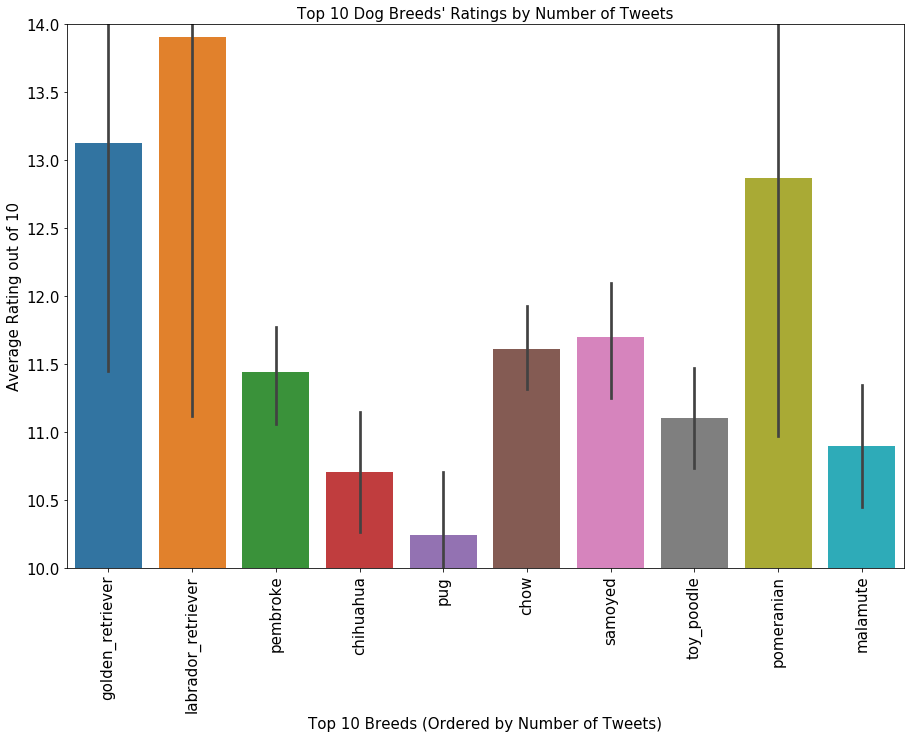

In [245]:
plt.subplots(figsize=(15,10))
sns.barplot(x='p1',y='rating_numerator',data=top_10_df, order=top_10_breeds)
plt.xlabel('Top 10 Breeds (Ordered by Number of Tweets)',fontsize=15)
plt.ylabel('Average Rating out of 10',fontsize=15)
plt.ylim(10,14)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Dog Breeds' Ratings by Number of Tweets",fontsize=15)
plt.savefig('Top10Breeds.png',bbox_inches = "tight");

**As shown in the above bar plot, labrador_retriever appears to receive the highest ratings on WeRateDogs, while golden_retriever appears to be the most tweeted dog breed**

<a id='reporting'></a>
# III. Reporting

## i. Data Wrangling
See `wrangle_report.html`

## ii. Analysis and Visualization
See `act_report.html`